[Source walkthroug](https://stat.ethz.ch/~meierluk/teaching/anova/contrasts-and-multiple-testing.html)

In [1]:
treat.ord= rep(c("A", "B", "C", "D"), each = 5)
treat.ord

[1] "A" "A" "A" "A" "A" "B" "B" "B" "B" "B" "C" "C" "C" "C" "C" "D" "D" "D" "D"
[20] "D"

In [2]:
tread.ord

ERROR: Error in eval(expr, envir, enclos): object 'tread.ord' not found


In [ ]:
## random sample
sample(treat.ord)

## 3.1.2 Parameter Estimation 


\begin{align*}
  y_{i\cdot}      & = \sum_{j=1}^{n_i} y_{ij} & \textrm{sum of group $i$}\\
  y_{\cdot \cdot} & = \sum_{i=1}^g \sum_{j=1}^{n_i} y_{ij} & 
    \textrm{sum of all observations}\\
  \overline{y}_{i\cdot} & = \frac{1}{n_i} \sum_{j=1}^{n_i} y_{ij} & 
    \textrm{mean of group $i$}\\
  \overline{y}_{\cdot\cdot} & = \frac{1}{N} \sum_{i=1}^g \sum_{j=1}^{n_i} y_{ij} & 
    \textrm{overall (or total) mean}
\end{align*}

In [ ]:
data(PlantGrowth)
str(PlantGrowth)

We can see that `group` is a __categorical predictor__ having three levels, which the first level is `cntl` or control. lets evaluate more details about the factors in this dataset:

In [ ]:
levels(PlantGrowth$group)

Plot Data

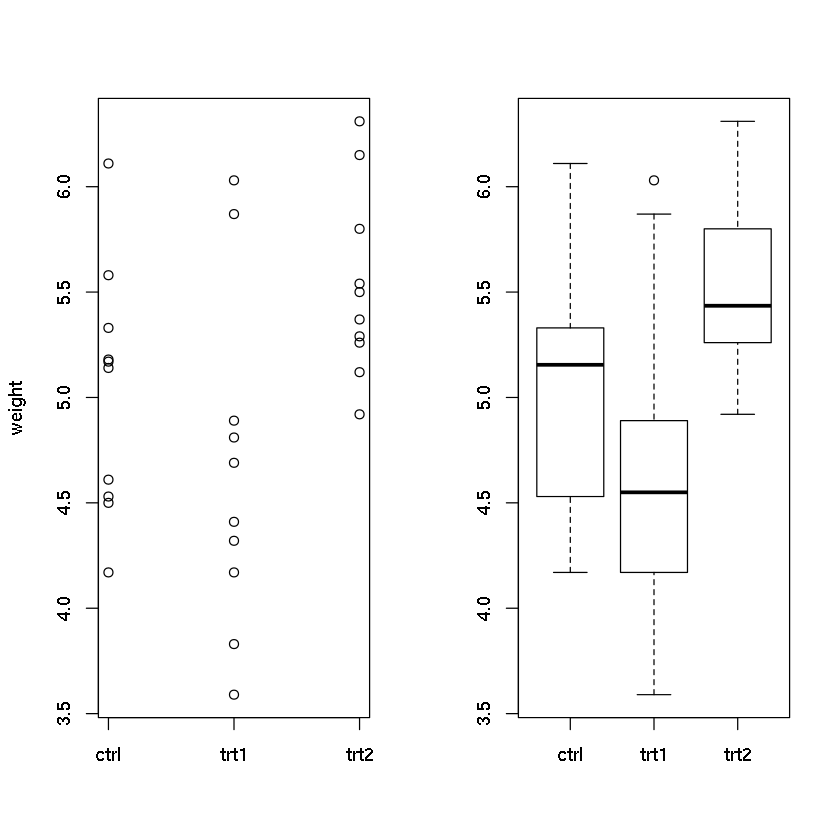

In [3]:
par(mfrow = c(1,2))  # split the plot
stripchart(weight ~ group, vertical = TRUE, pch = 1, data=PlantGrowth)
boxplot(weight ~ group, data = PlantGrowth)

Here we are calling the __categorical predictor__ or factors within the `group` according to our response variable (weight) using the below equation:

\begin{equation}
  \mu_i = \mu + \alpha_i
  \tag{3.3}
\end{equation}

Where - We also call $α_i$ the $i$th treatment effect. and we can think of $μ$ as a "global mean" and $α_i$ as a _"deviaiton from the global mean due to the $i$th treatment"_

Next we fit the ANOVA model using the `aov` function. We state the model using the formula notation where the response is listed on the left-hand side and the (only) predictor is on the right hand side of the tilde sign `~`. Then use call the `coef` function to __estimate the parameters__

In [4]:
fit = aov(weight ~ group, data = PlantGrowth)

coef(fit) # print the estimated coefficients

(Intercept)   grouptrt1   grouptrt2 
      5.032      -0.371       0.494

In [5]:
dummy.coef(fit)

Full coefficients are 
                                    
(Intercept):     5.032              
group:            ctrl   trt1   trt2
                 0.000 -0.371  0.494

The `(intercept)` corresponds to μ = 5.032 which is the estimated value of the expected value of the _reference group_ `ctl` bcause by default we use `control.treatement` and the frist level is the refeference group.

From there we thave the `grouptr1` which is $\widehat{\alpha}_2 = -0.371$. __This means that the difference group `trt1` to group `ctrl` is estimated to be -0.371.__

The last column is `grouptr2` which is $\widehat{\alpha}_3 = 0.494$. This is the difference of group `trt2` to group `ctrl`. 

Hense for all levels except the reference level we see difference to the reference group while estimate of the reference level can be found in the column `(intercept)`

We can also get $\widehat{\mu}_i$ which is the __predicted value per treatement group__ we can also obtain this value by using the `predict` function on the `fit` object. The `fit` objuct contains all information about the estimated model. 

In [6]:
predict(fit, newdata = data.frame(group = c("ctrl", "trt1", "trt2")))

1     2     3 
5.032 4.661 5.526

In [7]:
5.032-0.371

[1] 4.661

Say we want to change the side-constrate to sum-to-zero, we use the `contr.sum` option to change the encoding on the global level

In [8]:
options(contrasts = c("contr.sum", "contr.poly"))
fit2 = aov(weight ~ group, data = PlantGrowth)
coef(fit2)

(Intercept)      group1      group2 
      5.073      -0.041      -0.412

In [9]:
dummy.coef(fit2)

Full coefficients are 
                                    
(Intercept):     5.073              
group:            ctrl   trt1   trt2
                -0.041 -0.412  0.453

We get different values because the meaning of the parameters has changed. 

In [10]:
predict(fit2, newdata = data.frame(group = c("ctrl", "trt1", "trt2")))

1     2     3 
5.032 4.661 5.526

we can compare the `predict` output from `fit` and `fit2` and see that the predictions have not change. Therefore, predicted values do not depend on _side contraint_, but _side contraint_ has a large impact on the meaning of the parameters of the model.

Next we run the `summary` function to get the ANOVA table and the p-value

In [11]:
summary(fit)

            Df Sum Sq Mean Sq F value Pr(>F)  
group        2  3.766  1.8832   4.846 0.0159 *
Residuals   27 10.492  0.3886                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

we get the p-value = 0.0159, hence we __reject the null hypothesis__ on a 5% significance level. 

We can also perform the f-test  by using the `drop1` function which performs a test whether a single term/factor can be dropped form the model

In [12]:
drop1(fit, test = "F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,10.49209,-25.51727,NA,NA
group,2,3.76634,14.25843,-20.31547,4.846088,0.01590996


we get the same p-value.

compare two different models

In [13]:
# fit single mean model
fit.single = aov(weight ~ 1, data = PlantGrowth) # 1 means global mean (intercept)

anova(fit.single, fit) # compare with cell means model

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
29,14.25843,NA,NA,NA,NA
27,10.49209,2,3.76634,4.846088,0.01590996


In [14]:
PlantGrowth$weight

[1] 4.17 5.58 5.18 6.11 4.50 4.61 5.17 4.53 5.33 5.14 4.81 4.17 4.41 3.59 5.87
[16] 3.83 6.03 4.89 4.32 4.69 6.31 5.12 5.54 5.50 5.37 5.29 4.92 6.15 5.80 5.26

same p-value

To perform statistical inference for individual factor groups we can use `summary.lm` for test and `confint` for confidence intervals

In [15]:
summary.lm(fit)


Call:
aov(formula = weight ~ group, data = PlantGrowth)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0710 -0.4180 -0.0060  0.2627  1.3690 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.0320     0.1971  25.527   <2e-16 ***
grouptrt1    -0.3710     0.2788  -1.331   0.1944    
grouptrt2     0.4940     0.2788   1.772   0.0877 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6234 on 27 degrees of freedom
Multiple R-squared:  0.2641,	Adjusted R-squared:  0.2096 
F-statistic: 4.846 on 2 and 27 DF,  p-value: 0.01591


In [16]:
confint(fit)

,2.5 %,97.5 %
(Intercept),4.62752600,5.4364740
grouptrt1,-0.94301261,0.2010126
grouptrt2,-0.07801261,1.0660126


interpretaiton of output is highly based on side-constraint being used however can be read as such: confidence interval -0.943, 0.201 for the difference between `trt1` and `ctrl`

## Checking Assumptions (Residual Analysis)

Our test are only valid if the model assumptions hold true. We can validate the assumptions by asking the following questions:

* are the errors independent? (most important)
* are the errors normally distributed?
* is the error variance constant?
* do the errors have mean zero? (for anova not as critical as anova is resistant as were are typically fitting large models)

The easiest method to assess the validity of these assumptions are to check visually:

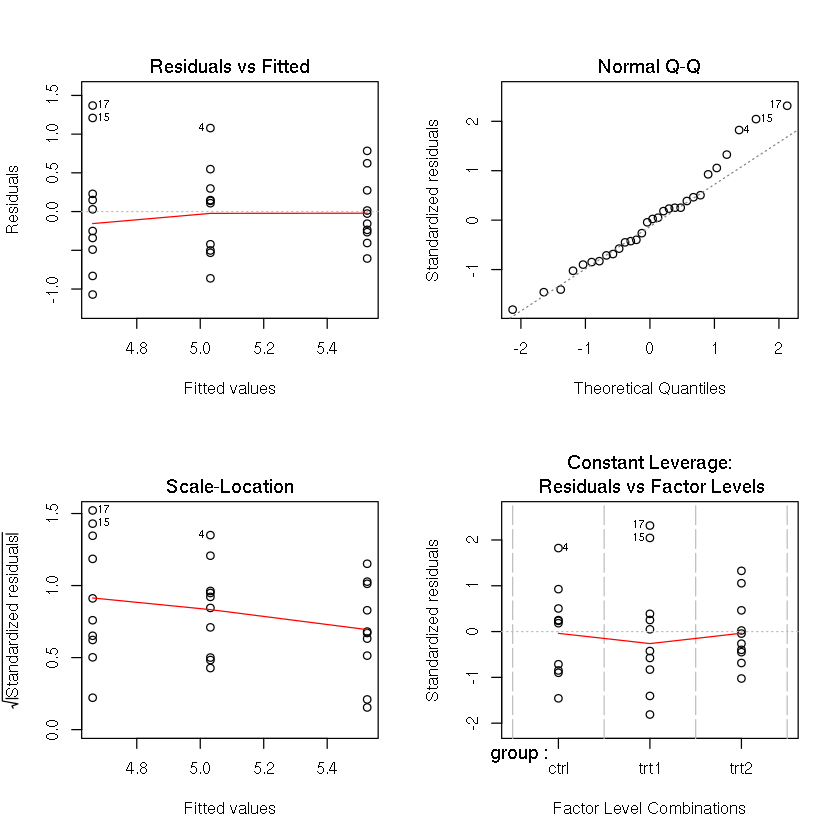

In [17]:
par(mfrow = c(2,2))
plot(fit)

#### QQ Plot
The plot should show a more or less straight line if the distributional assumption is correct. By default, a standard normal distribution is the theoretical “reference distribution”.

#### Residuals vs Fitted

plots the residuals rij vs. the fitted values μ^i. It allows us to check whether the residuals have constant variance and whether the residuals have mean zero (i.e. they don’t show any deterministic pattern).

In [18]:
PlantGrowth[c(1, 2, 11, 12, 21, 22),]

,weight,group
1,4.17,ctrl
2,5.58,ctrl
11,4.81,trt1
12,4.17,trt1
21,6.31,trt2
22,5.12,trt2


## Post Hoc Testing (Contrast / Multiple Testing)

The F-test is unspecific - it basically gives us a yes/no answer for the question _"is there any treatment effect at all?"_. It does not tell us what specific treatment (or treatment combination) is significant. 

A contrast is a set of weights (a vector) that defines a specific comparison over scores or means. They are used, among other things, to test more focused hypotheses than the overall omnibus test of the ANOVA.

So in this example below are our hypothesis:

$H_0: \mu_1 - \mu_2 = 0$

$H_A: \mu_1 - \mu_2 \neq 0$

Which we can encode this with a vector $c \in \mathbb{R}^g$ : 

$H_0: \sum_{i=1}^g c_i \mu_i = 0$

This can be decribed as vector c is equal to c = (1, -1, 0) with respects to `ctrl`, `trt1` and `trt2`. Hence, a contrast is an ecoding of our own specific research question. Which below we will have vector c is qual to c = (1, -1/2, -1/2) which compares `ctrl` versus __the average value__ of `trt1` and `trt2`

we add a side contraint

$\sum_{i=1}^g c_i = 0$

This makes sure that the contrast is about _difference between treatements_ and not about the overall level of our response

We will use the following as a __estimate a contrast true__ but unknown value which is a linear combinaiton of model paraters

$\sum_{i=1}^g c_i \widehat{\mu}_i$



We will perform the contrast and multiple testing with the genral linear hypothesis function `glht` which is a packages form `multcomp` that was created by Hothorn, Bertz, and Westfall 

Hothorn, Torsten, Frank Bretz, and Peter Westfall. 2016. Multcomp: Simultaneous Inference in General Parametric Models. https://CRAN.R-project.org/package=multcomp.

In [19]:
library(multcomp)

fit.gh = glht(fit, linfct = mcp(group = c(1, -1/2, -1/2)))
summary(fit.gh)

Loading required package: mvtnorm
Loading required package: survival
Loading required package: TH.data
Loading required package: MASS

Attaching package: ‘TH.data’

The following object is masked from ‘package:MASS’:

    geyser




	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: User-defined Contrasts


Fit: aov(formula = weight ~ group, data = PlantGrowth)

Linear Hypotheses:
       Estimate Std. Error t value Pr(>|t|)
1 == 0  -0.0615     0.2414  -0.255    0.801
(Adjusted p values reported -- single-step method)


We can interpretate the GLH test results as follows:
- the `estimtate std.` provides us the difference between `ctrl` and the difference between the __average value__ of `trt1` and `trt2` as -0.0615
- `P-value` is 0.801, therefore we __fail to reject $H_o$ 
- the annotation `1 == 0` means that this line tests whether the first (here: and only) contrast is zero or not

In [20]:
# obtain confidence interval

confint(fit.gh)


	 Simultaneous Confidence Intervals

Multiple Comparisons of Means: User-defined Contrasts


Fit: aov(formula = weight ~ group, data = PlantGrowth)

Quantile = 2.0518
95% family-wise confidence level
 

Linear Hypotheses:
       Estimate lwr     upr    
1 == 0 -0.0615  -0.5569  0.4339


The conﬁdence interval for µ1− 1 2(µ2 +µ3) is given by [−0.5569,0.4339]. 

## 4.2 Multiple Testing
The problem with all statistical tests is the fact that the (overall) error rate increases with increasing number of tests.

Using the two contrast
1. $c_1 = (1, -1/2, -1/2)$ - the control vs the average of the remaining treatements
2. $c_2 = (1, -1, 0)$ - control vs treatement 1

### Bonferroni

In [21]:
# create a matrix where each row is a contrast
K = rbind(c(1, -1/2, -1/2),    ## ctrl vs avg of trt1 and trt2
          c(1, -1, 0))      ## ctrl vs trt1

fit.gh = glht(fit, linfct = mcp(group = K))
summary(fit.gh)


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: User-defined Contrasts


Fit: aov(formula = weight ~ group, data = PlantGrowth)

Linear Hypotheses:
       Estimate Std. Error t value Pr(>|t|)
1 == 0  -0.0615     0.2414  -0.255    0.924
2 == 0   0.3710     0.2788   1.331    0.264
(Adjusted p values reported -- single-step method)


In [22]:
# individual p-values
summary(fit.gh, test = adjusted("none"))


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: User-defined Contrasts


Fit: aov(formula = weight ~ group, data = PlantGrowth)

Linear Hypotheses:
       Estimate Std. Error t value Pr(>|t|)
1 == 0  -0.0615     0.2414  -0.255    0.801
2 == 0   0.3710     0.2788   1.331    0.194
(Adjusted p values reported -- none method)


In [23]:
# Bonferroni corrected p-values
summary(fit.gh, test = adjusted("bonferroni"))


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: User-defined Contrasts


Fit: aov(formula = weight ~ group, data = PlantGrowth)

Linear Hypotheses:
       Estimate Std. Error t value Pr(>|t|)
1 == 0  -0.0615     0.2414  -0.255    1.000
2 == 0   0.3710     0.2788   1.331    0.389
(Adjusted p values reported -- bonferroni method)


we will also tryp otu the __Bonferroni-Holm__ whic is less conservative and uniformly more powerful than Bonferroni. 

In [24]:
summary(fit.gh, test = adjusted("holm"))


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: User-defined Contrasts


Fit: aov(formula = weight ~ group, data = PlantGrowth)

Linear Hypotheses:
       Estimate Std. Error t value Pr(>|t|)
1 == 0  -0.0615     0.2414  -0.255    0.801
2 == 0   0.3710     0.2788   1.331    0.389
(Adjusted p values reported -- holm method)


### Scheffe
Scheffe is a post hoc test that is used with iunequal sample sizes to find out which pairs of means are significant. The procedure controls for the search over any possible contrast

In [25]:
# calculate the contrast as "ordinary" contrast
fit.scheffe = glht(fit, linfct = mcp(group = c(1/2, -1, 1/2)))

# report the value of the t-test
summary(fit.scheffe)


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: User-defined Contrasts


Fit: aov(formula = weight ~ group, data = PlantGrowth)

Linear Hypotheses:
       Estimate Std. Error t value Pr(>|t|)  
1 == 0   0.6180     0.2414    2.56   0.0164 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


In [26]:
# here is the t-value
summary(fit.scheffe)$test$tstat

1 
2.559727

In [27]:
# take  the square of the t-test form above

## p-value according to Scheffe (g = 3, N - g = 27)
pf((summary(fit.scheffe)$test$tstat)^2 / 2, 2, 27, lower.tail = FALSE)

1 
0.05323245

### Tukey Honest Significant Difference (HSD)

The Turkey test HSD test all pairwise coparisions among the mean swe call to the function. We could perform all pairwise t-tests with the function pairwise.t.test (it uses a pooled standard deviation estimate from all groups).

#### Note:
When we are running the `pairwise.t.test()` function we must consider the following major arguments:
- x: dependent variable
- g: independent variable
- p.adj: the p-value adjustement method used to control for the family-wise Type I error tates across the comparisons: one of "none", "bonferroni", "holm",...

In [28]:
# without correction (but pulled sd estimate)
pairwise.t.test(PlantGrowth$weight, PlantGrowth$group, 
                p.adjust.method = "non")


	Pairwise comparisons using t tests with pooled SD 

data:  PlantGrowth$weight and PlantGrowth$group 

     ctrl   trt1  
trt1 0.1944 -     
trt2 0.0877 0.0045

P value adjustment method: none 

#### Interpretation:
With the significance level .05 for the test, we no ajustments for the type I error rate the results indicate a __statistically significant difference between the `trt1` and `trt2` (p= 0.0045)__. However we did not have a statistical differene between `ctrl` and `trt1` p= 0.1944 and `ctrl` and `trt2` p = 0.0877 treatments. Therefore, we are inclined to conclde based on this study that `treatement 1` and `treatement 2` lead to greater differences than the control method, however thiere is insufficient statistical support to determine that either the `trt1` or `trt2` treatemetns is superior. 

We can now use the __Bonferroni-holm__ correction method (`p.adjust.method = "holm"` to get p-values that are adjusted for multiple tetsing

In [29]:
## with corrrection (and pooled sd estimate)
pairwise.t.test(PlantGrowth$weight, PlantGrowth$group, 
               p.adjust.methods = "holm")


	Pairwise comparisons using t tests with pooled SD 

data:  PlantGrowth$weight and PlantGrowth$group 

     ctrl  trt1 
trt1 0.194 -    
trt2 0.175 0.013

P value adjustment method: holm 

With the result adding the p-adjusted method of holms this provides a similar result as we saw with no p-value adjustements. 


### Tukey
lets try the tukey method as an alternative procedure that also gives us both p-values and confidence intervals. 

In [30]:
TukeyHSD(fit)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = weight ~ group, data = PlantGrowth)

$group
            diff        lwr       upr     p adj
trt1-ctrl -0.371 -1.0622161 0.3202161 0.3908711
trt2-ctrl  0.494 -0.1972161 1.1852161 0.1979960
trt2-trt1  0.865  0.1737839 1.5562161 0.0120064


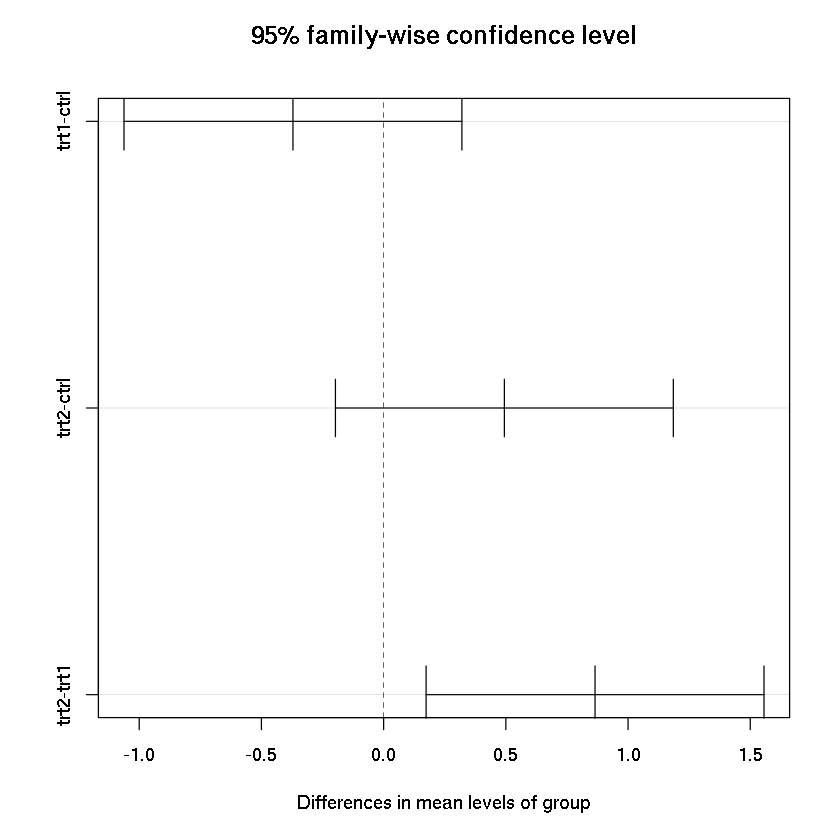

In [31]:
plot(TukeyHSD(fit))

From the TukeyHSD plot above we can visualize the pairs in the treatements and analyze significant differences. __Significant differences are the plots which do not coress the zero value__. Therefore, the differnces between `trt1` and `trt2`is significant. 

we can obtain similar results just using the `multcomp` and calling `tukey`

In [32]:
# run tukey HSD with the multcomp package
fit.tukey = glht(fit, linfct = mcp(group = "Tukey"))
summary(fit.tukey)


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = weight ~ group, data = PlantGrowth)

Linear Hypotheses:
                 Estimate Std. Error t value Pr(>|t|)  
trt1 - ctrl == 0  -0.3710     0.2788  -1.331    0.391  
trt2 - ctrl == 0   0.4940     0.2788   1.772    0.198  
trt2 - trt1 == 0   0.8650     0.2788   3.103    0.012 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


As we can see with factor groups `trt2` and `trt1` p-value = 0.0119, there is a significant difference

In [33]:
confint(glht(fit.tukey))

Warning message in chkdots(...):
“Argument(s) ‘complete’ passed to ‘...’ are ignored”Warning message in chkdots(...):
“Argument(s) ‘complete’ passed to ‘...’ are ignored”


	 Simultaneous Confidence Intervals

Fit: NULL

Quantile = 2.3433
95% family-wise confidence level
 

Linear Hypotheses:
                 Estimate lwr     upr    
trt1 - ctrl == 0 -0.3710  -1.0243  0.2823
trt2 - ctrl == 0  0.4940  -0.1593  1.1473
trt2 - trt1 == 0  0.8650   0.2117  1.5183


we can see that `trt2 - trt` is the only group that does not cross zero for its confidence interval/

Warning message in chkdots(...):
“Argument(s) ‘complete’ passed to ‘...’ are ignored”Warning message in chkdots(...):
“Argument(s) ‘complete’ passed to ‘...’ are ignored”

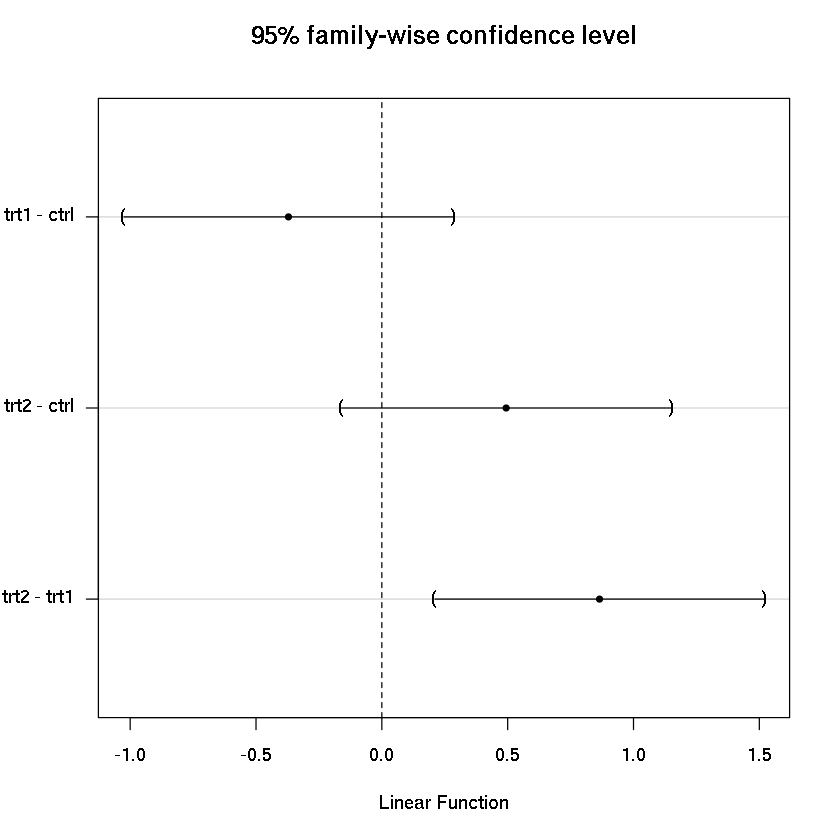

In [34]:
plot(confint(glht(fit.tukey)))

### 4.2.5 Multiple Comparison with a Control (MCC)

Compare all treatement groups with a control group.

In [35]:
fit.dunnett = glht(fit, linfct = mcp(group = "Dunnett"))
summary(fit.dunnett)


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: aov(formula = weight ~ group, data = PlantGrowth)

Linear Hypotheses:
                 Estimate Std. Error t value Pr(>|t|)
trt1 - ctrl == 0  -0.3710     0.2788  -1.331    0.323
trt2 - ctrl == 0   0.4940     0.2788   1.772    0.153
(Adjusted p values reported -- single-step method)


We get smaller p-values than with the Tukey HSD procedure because we have to correct for less tests (there are more comparisons between pairs than there are comparisons to the control treatment).

## Chapter 5. Factorial Treatment Strucure

Recall a factor is an aspect of our treatment. If we have a plat expperiment using combinaitons of light exposure and fertilizer we have a __combination of factors__. This is a __factorial treatment structure__. 

If we see all possible combinaitons of the levels of two or more factores, we call them __crossed__.

In [41]:
acids <- c(1.697, 1.601, 1.830,
           2.032, 2.017, 2.409,
           2.211, 1.673, 1.973, 
           2.091, 2.255, 2.987)
R50 <- rep(c("no", "yes", "no", "yes"), each = 3)
R21 <- rep(c("no", "no", "yes", "yes"), each = 3)
cheddar <- data.frame(R50, R21, acids)
head(cheddar)

R50,R21,acids
no,no,1.697
no,no,1.601
no,no,1.830
yes,no,2.032
yes,no,2.017
yes,no,2.409


below we can see that we have 3 observations that include every combination for R50 and R20.

In [42]:
xtabs(~ R50 + R21, data = cheddar)

     R21
R50   no yes
  no   3   3
  yes  3   3

Visualized the __interaction plot__ using the `interaciton.plot` function, basically taking every combination for `R50` and `R21` `("yes" / "no")` we calculate the average value of the response. 

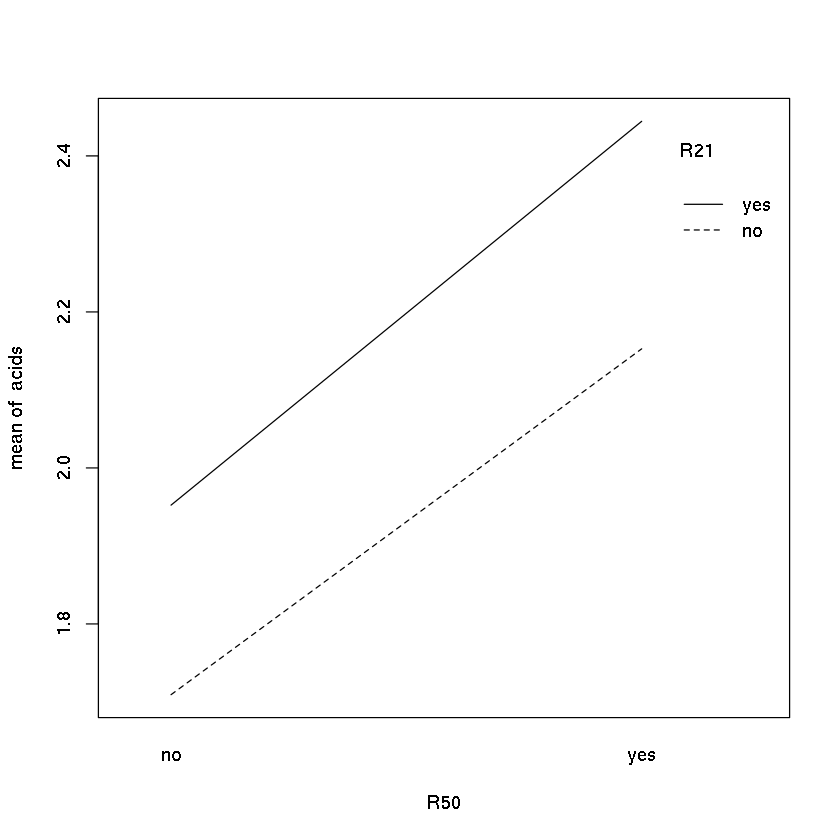

In [43]:
with(cheddar, interaction.plot(x.factor = R50, trace.factor = R21, response = acids))
## standard way: interaction.plot(x.factor = cheddar$R50, trace.factor = cheddar$R21,
##                                response = cheddar$acids)

We see that the lines are __(almost) parallel here. This means that it looks like the effect of R50 does not depend on the level of R21 (and vice versa).__ Adding “R50#10” seems to increase total free amino acids by about 0.5, while adding “R21#10” has an effect of about 0.3 on total free amino acids

However a drawback from this chart is that we cant use this plot to determine statistical significance, as the underlying data is not shown but simply averaged. Hense we will need an additional plot. 

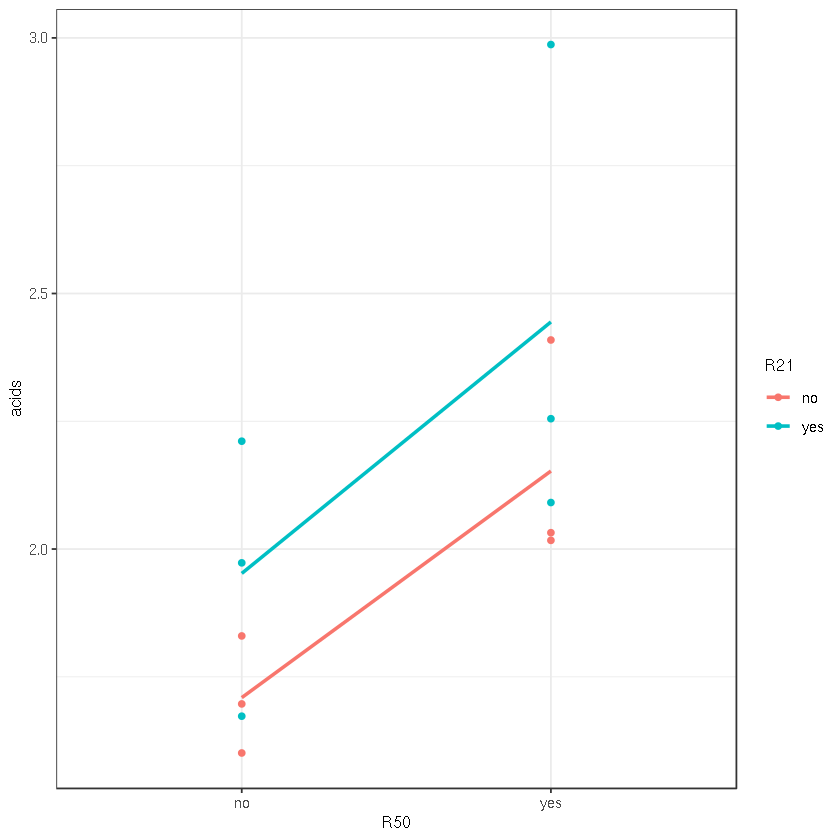

In [44]:
library(ggplot2)
ggplot(cheddar, aes(x = R50, y = acids, color = R21)) + geom_point() +
  stat_summary(fun.y = mean, geom = "line", aes(group = R21), size = 1) + theme_bw()

With the plot above we can see that the effects are rather small when we can compare the variation of individual observations. 

# 5.1 Two-way ANOVA Model

$Y_{ijk} = \mu + \alpha_i + \beta_j + (\alpha \beta)_{ij} + \epsilon_{ijk}$